# Movie Data Analysis

url = https://www.kaggle.com/datasets/danielgrijalvas/movies
<br>
shape = (7668, 15)

In [40]:
# pandas to read csv into dataframe
import pandas as pd

movies = pd.read_csv('movies.csv').dropna()    # drop all na values

movies.info()
#movies.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


# Data Preprocessing
new shape = (5421, 9)
<br>
**NUMERIC**: score, votes, budget, gross, runtime *(5)*
<br>
**CATEGORIES**: name, genre, country, company *(4)*

In [57]:
# condense dataframe to 5 numerical and 3 categorical variables
target_col = ['name', 'genre', 'score', 'votes', 'country', 'budget', 'gross', 'company', 'runtime']
df = movies[target_col]

df.head()

,name,genre,score,votes,country,budget,gross,company,runtime
0,The Shining,Drama,8.4,927000.0,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,Adventure,5.8,65000.0,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,Action,8.7,1200000.0,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,Comedy,7.7,221000.0,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,Comedy,7.3,108000.0,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Exploratory Data Analysis

### Visualizing Distribution of Numerical Types

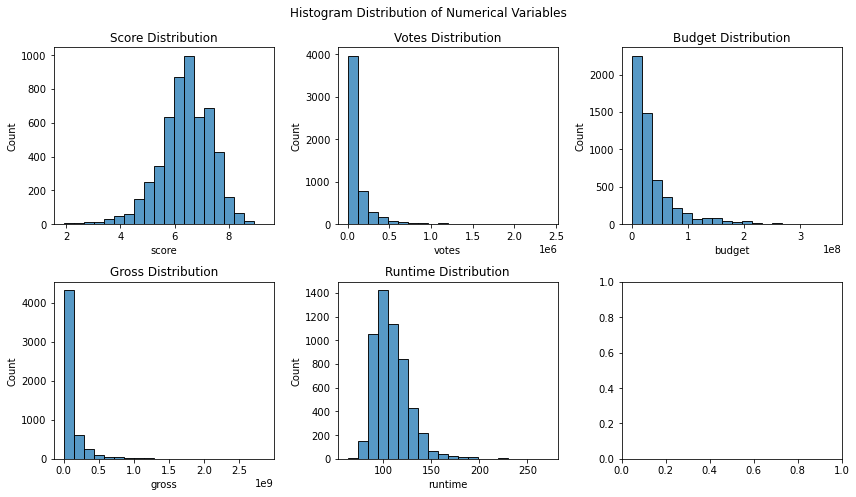

In [28]:
# matplotlib for data vis
import matplotlib.pyplot as plt
import seaborn as sns

fig1, axs1 = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))
fig1.suptitle('Histogram Distribution of Numerical Variables')

# score hist
sns.histplot(data=df['score'], bins=20, ax=axs1[0,0])
axs1[0,0].set_title('Score Distribution')

# votes hist
sns.histplot(data=df['votes'], bins=20, ax=axs1[0,1])
axs1[0,1].set_title('Votes Distribution')

# budget hist
sns.histplot(data=df['budget'], bins=20, ax=axs1[0,2])
axs1[0,2].set_title('Budget Distribution')

# gross hist
sns.histplot(data=df['gross'], bins=20, ax=axs1[1,0])
axs1[1,0].set_title('Gross Distribution')

# runtime hist
sns.histplot(data=df['runtime'], bins=20, ax=axs1[1,1])
axs1[1,1].set_title('Runtime Distribution')


# show hist plots
plt.tight_layout()

### Analysis of Numerical Histograms
* The 'score' distribution closely resembles a normal distribution of all targets, but also seems to be skewed to the right. It seems that the average score tends to fall between 6 and 7.
* the 'votes' distribution is skewed to the left with most votes representing close to only 100,000 votes with a maximum of around 1.2 million votes
* the 'budget' of most movies centered around 100 thousand dollars with a few movies having over 200 million dollar budgets.
* most movies accumulated about 100 million dollars in gross profit with a few making over 1 billion dollars.
* the 'runtime' distribution also closely resembles a narrow normal distribution with a small standard deviation. It seems that most movies last around 100 minutes to 2 hours.

### Scatter Plot Matrix of Numerics

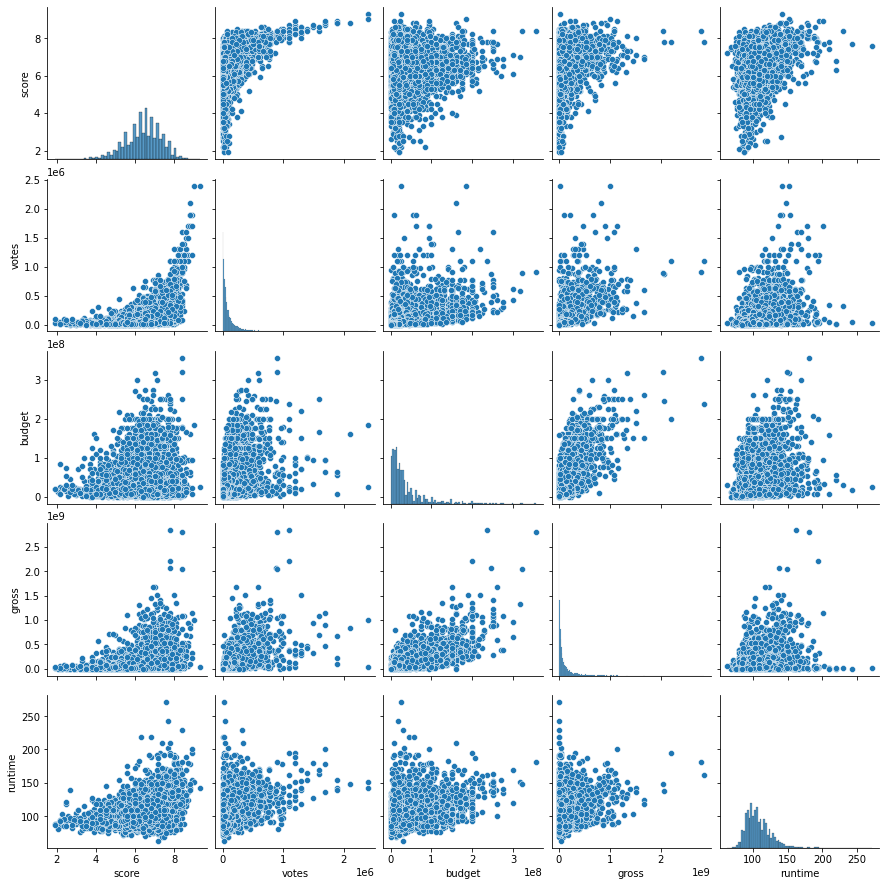

In [46]:
sns.pairplot(df)
plt.show()

### Analysis of Scatter Plot Matrix

* we can easily spot positive correlations between the gross amount and budget for a particular movie. The higher the budget, the higher gross earnings.
* there seems to be close to no correlation between the number of votes and the runtime. A movie with 2+ million votes had the same runtime as a movie with closer to 100 thousand votes.
* there is seemingly no relationship between score and gross where varying runtimes does not indicate a particular gross earning.
* this is interesting, because we see that movies with a high number of votes indicates that the movie has a high score, and that a movie with a low score indicates a bad score as well.

### Visualizing Distribution of Categorical Types

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


ValueError: could not convert string to float: 'The Shining'

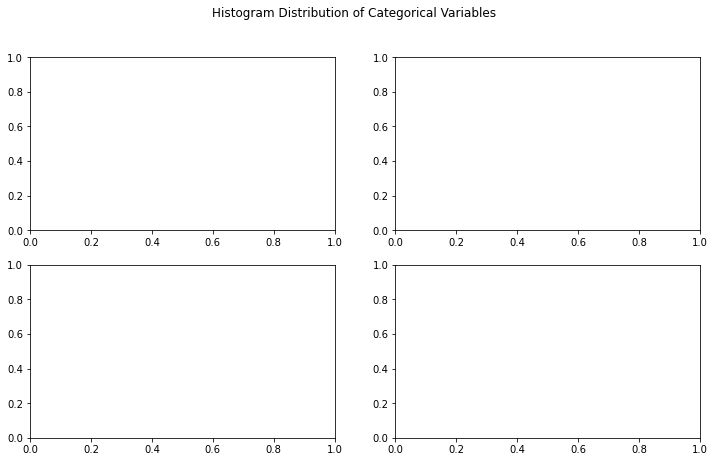

In [47]:
# matplotlib for data vis

fig2, axs2 = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))
fig2.suptitle('Histogram Distribution of Categorical Variables')

# name hist
sns.catplot(data=df['name'], ax=axs2[0,0])
axs2[0,0].set_title('Name Distribution')

# genre hist
sns.barplot(data=df['genre'], ax=axs2[0,1])
axs2[0,1].set_title('Genre Distribution')

# budget hist
sns.barplot(data=df['country'], ax=axs2[1,0])
axs2[1,0].set_title('Country Distribution')

# company hist
sns.barplot(data=df['company'], ax=axs2[1,1])
axs2[1,1].set_title('Company Distribution')


# show hist plots
plt.tight_layout()

### Analysis of Categorical Histograms

* I hate this and that

# Storytelling

Simply from looking at the distribution of the numerical target variables, we can tell that the average rating of a movie is about a 6 out of 10. This tells us that on average most movies perform moderatly good for the audience. With that being said, we can also notice that most movies are between 1 hour and a half to two. It would be interesting to see how well movies that had a lower or higher runtime than average performed with their respective scores and votes.
<br>
<br>
We examined most movies having an average of 100 thousand votes, with a few outliers falling in the 1+ million range. This could indicate that the movie industry is highly competitive, and very select few can garner the attention and votes of a significant amount of people. We have also seen that movies with a high budget tends to have a high gross earnings from our seaborn scatter plot matrix. This shows that movie companies and directors can use more money to enhance the movie quality, which could include its runtime.
<br>
<br>
By looking at our categorical data analysis, we can tell that a few companies dominated the movie industry.

# Data Insights and Visuals

### 1. Outlier Detection with Box and Whisker

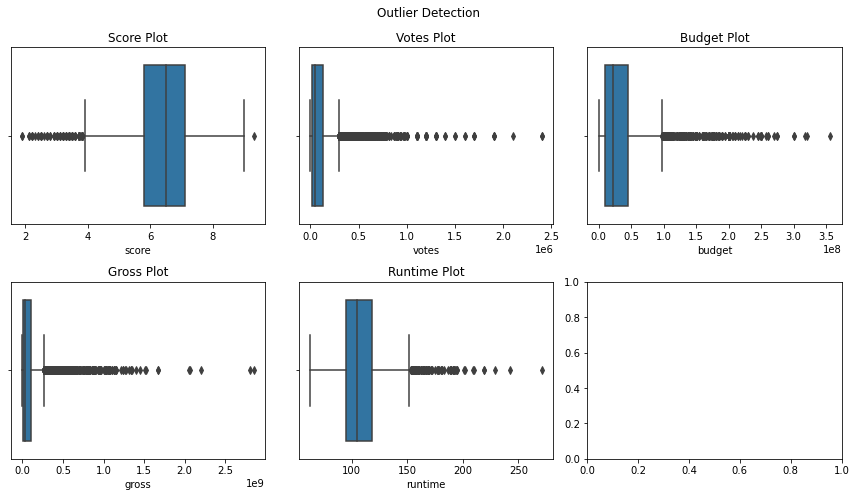

In [52]:
# create box and whisker plot of numerical types to visualize outliers
fig3, axs3 = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))
fig3.suptitle('Outlier Detection')

sns.boxplot(x=df['score'], ax=axs3[0,0])
axs3[0,0].set_title('Score Plot')

sns.boxplot(x=df['votes'], ax=axs3[0,1])
axs3[0,1].set_title('Votes Plot')

sns.boxplot(x=df['budget'], ax=axs3[0,2])
axs3[0,2].set_title('Budget Plot')

sns.boxplot(x=df['gross'], ax=axs3[1,0])
axs3[1,0].set_title('Gross Plot')

sns.boxplot(x=df['runtime'], ax=axs3[1,1])
axs3[1,1].set_title('Runtime Plot')

plt.tight_layout()

We can see that with the exception of the 'score' plot, all of our target variables contain significant outliers, which easily explain our heavily skewed histograms. Since the 'score' distribution resembled a normal in some aspects, we can expect it to contain less outliers. However, since the distribution seems to be skewed to the right, unlike the rest to the left, we have outliers appearing on the lower end. This means that there were lots of movies that had low scores.
<br>
<br>
One would ask why such data contains so many outliers?

### 2. Top 5 Gross Movies with Respective Score and Budget

In [74]:
high_5_gross = df.sort_values(by='gross', ascending=False).groupby('name')['gross'].head(5)

for idx in high_5_gross.index:
    print(df.loc[idx, 'name'])

Avatar
Avengers: Endgame
Titanic
Star Wars: Episode VII - The Force Awakens
Avengers: Infinity War
The Lion King
Jurassic World
The Avengers
Furious 7
Frozen II
Avengers: Age of Ultron
Black Panther
Harry Potter and the Deathly Hallows: Part 2
Star Wars: Episode VIII - The Last Jedi
Jurassic World: Fallen Kingdom
Frozen
Beauty and the Beast
Incredibles 2
The Fate of the Furious
Iron Man 3
Minions
Captain America: Civil War
Aquaman
The Lord of the Rings: The Return of the King
Spider-Man: Far from Home
Captain Marvel
Transformers: Dark of the Moon
Skyfall
Transformers: Age of Extinction
The Lion King
The Dark Knight Rises
Star Wars: Episode IX - The Rise of Skywalker
Joker
Toy Story 4
Toy Story 3
Pirates of the Caribbean: Dead Man's Chest
Rogue One: A Star Wars Story
Aladdin
Pirates of the Caribbean: on Stranger Tides
Despicable Me 3
Jurassic Park
Finding Dory
Star Wars: Episode I - The Phantom Menace
Alice in Wonderland
Zootopia
The Hobbit: An Unexpected Journey
Harry Potter and the So

### 3. Final Thing